# MSIS 579 HW2 CNN to recognize Rock/Paper/Scissors

In this homework, we will train a convolution neural network to recognize gesture Rock/Paper/Scissors. 

## Load Rock/Paper/Scissors Dataset
First we download the data and put them into its own directories for model training and evaluation. There are two dataset in zip format. Download each and put them into the corresponding directories.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-05-21 05:51:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.80, 142.250.81.208, 142.251.33.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   174MB/s    in 1.1s    

2021-05-21 05:51:44 (174 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-05-21 05:51:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 172.253.62.128, 172.217.164.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/

In [2]:
%tensorflow_version 1.14
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


After running the folloiwng code, you will have exactly 840 images for each gesture. 

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-025.png', 'rock01-063.png', 'rock07-k03-062.png', 'rock02-025.png', 'rock05ck01-070.png', 'rock05ck01-058.png', 'rock01-000.png', 'rock02-053.png', 'rock06ck02-099.png', 'rock03-046.png']
['paper02-102.png', 'paper01-083.png', 'paper02-024.png', 'paper03-051.png', 'paper01-004.png', 'paper06-075.png', 'paper04-071.png', 'paper06-066.png', 'paper06-117.png', 'paper07-018.png']
['scissors03-044.png', 'scissors02-058.png', 'scissors04-052.png', 'scissors02-092.png', 'testscissors03-096.png', 'testscissors01-099.png', 'testscissors02-091.png', 'scissors01-081.png', 'scissors04-025.png', 'testscissors02-107.png']


Now, let's plot 2 images from each class.  You wil find those images are taken from different views and images vary a lot even for the same gesture. 

/tmp/rps/rock/rock01-025.png


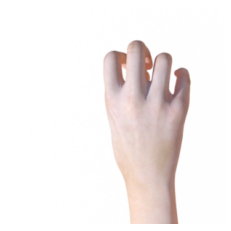

/tmp/rps/rock/rock01-063.png


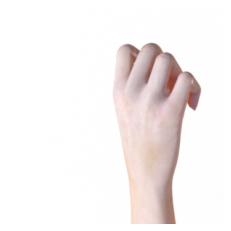

/tmp/rps/paper/paper02-102.png


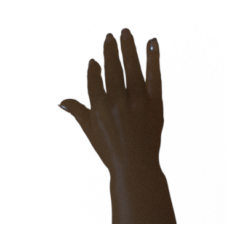

/tmp/rps/paper/paper01-083.png


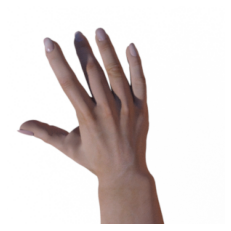

/tmp/rps/scissors/scissors03-044.png


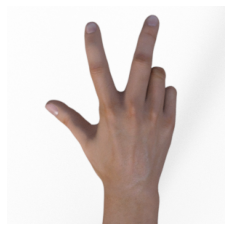

/tmp/rps/scissors/scissors02-058.png


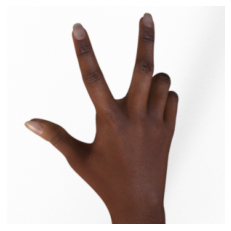

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## TASK 1: Build a fully connect Neural Network
First, let's try what we've learned from the previous lecture. We will build a FULLY connect neural networks to classify the gesture images.You are free to experiment with different structure of the network, data augmentation, dropout, different optimizer, and etc, to try to achieve the best performance on the TEST data in terms of accuracy.  Watch out for overfitting.

Note that you should set test aside when you train your model. In the end, please report your model accuracy on the test set. 

In [5]:
#preprocess data
import shutil
import os
test_dir = os.path.join('/tmp/rps-test-set')

test_rock_dir = os.path.join(test_dir, 'rock')
test_paper_dir = os.path.join(test_dir, 'paper')
test_scissors_dir = os.path.join(test_dir, 'scissors')


In [8]:
#split train and validation split
base_dir = '/tmp/rps_evl'
if os.path.exists(base_dir):
  shutil.rmtree(base_dir)
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'valid')
os.mkdir(validation_dir)

# training 
train_rock_dir = os.path.join(train_dir, 'rock')
os.mkdir(train_rock_dir)

train_paper_dir = os.path.join(train_dir, 'paper')
os.mkdir(train_paper_dir)

train_scissors_dir = os.path.join(train_dir, 'scissors')
os.mkdir(train_scissors_dir)

#validation
validation_rock_dir = os.path.join(validation_dir, 'rock')
os.mkdir(validation_rock_dir)

validation_paper_dir = os.path.join(validation_dir, 'paper')
os.mkdir(validation_paper_dir)

validation_scissors_dir = os.path.join(validation_dir, 'scissors')
os.mkdir(validation_scissors_dir)

In [9]:
#rock
for f in rock_files[:630]:
    source= os.path.join(rock_dir,f)
    destination = os.path.join(train_rock_dir,f)
    shutil.copyfile(source,destination)

for f in rock_files[-210:]:
    source= os.path.join(rock_dir,f)
    destination = os.path.join(validation_rock_dir,f)
    shutil.copyfile(source,destination)

#paper
for f in paper_files[:630]:
    source= os.path.join(paper_dir,f)
    destination = os.path.join(train_paper_dir,f)
    shutil.copyfile(source,destination)

for f in paper_files[-210:]:
    source= os.path.join(paper_dir,f)
    destination = os.path.join(validation_paper_dir,f)
    shutil.copyfile(source,destination)

#scissors
for f in scissors_files[:630]:
    source= os.path.join(scissors_dir,f)
    destination = os.path.join(train_scissors_dir,f)
    shutil.copyfile(source,destination)

for f in scissors_files[-210:]:
    source= os.path.join(scissors_dir,f)
    destination = os.path.join(validation_scissors_dir,f)
    shutil.copyfile(source,destination)


In [10]:
print('total training rock images:', len(os.listdir(train_rock_dir)))
print('total validation rock images:', len(os.listdir(validation_rock_dir)))
print('total test rock images:', len(os.listdir(test_rock_dir)))

total training rock images: 630
total validation rock images: 210
total test rock images: 124


In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')


Found 1890 images belonging to 3 classes.
Found 630 images belonging to 3 classes.


Using TensorFlow backend.


Found 630 images belonging to 3 classes.


In [12]:
#model
from keras import models
from keras import layers

FNN_model = models.Sequential()
FNN_model.add(layers.Dense(64, activation='relu', input_shape=(150,150,3)))
FNN_model.add(layers.Dense(32, activation='relu'))
FNN_model.add(layers.Flatten())
FNN_model.add(layers.Dense(3, activation='softmax'))

FNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150, 150, 64)      256       
_________________________________________________________________
dense_2 (Dense)              (None, 150, 150, 32)      2080      
_________________________________________________________________
flatten_1 (Flatten)          (None, 720000)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 2160003   
Total params: 2,162,339
Trainable params: 2,162,339
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras import optimizers

FNN_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

In [14]:
FNN_history = FNN_model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
100/100 [==============================] - 30s 298ms/step - loss: 10.1365 - acc: 0.3621 - val_loss: 0.9447 - val_acc: 0.5538
Epoch 2/20
100/100 [==============================] - 27s 272ms/step - loss: 1.1125 - acc: 0.4372 - val_loss: 1.0117 - val_acc: 0.5134
Epoch 3/20
100/100 [==============================] - 27s 269ms/step - loss: 1.0652 - acc: 0.4503 - val_loss: 0.8172 - val_acc: 0.5513
Epoch 4/20
100/100 [==============================] - 27s 270ms/step - loss: 1.0208 - acc: 0.4849 - val_loss: 0.8980 - val_acc: 0.5567
Epoch 5/20
100/100 [==============================] - 27s 266ms/step - loss: 1.0362 - acc: 0.4841 - val_loss: 0.8259 - val_acc: 0.5608
Epoch 6/20
100/100 [==============================] - 27s 272ms/step - loss: 1.0206 - acc: 0.5099 - val_loss: 0.7966 - val_acc: 0.6573
Epoch 7/20
100/100 [==============================] - 27s 266ms/step - loss: 1.0093 - acc: 0.5484 - val_loss: 0.7498 - val_acc: 0.6677
Epoch 8/20
100/100 [==============================] - 

In [15]:
FNN_model.save('FNN.h5')

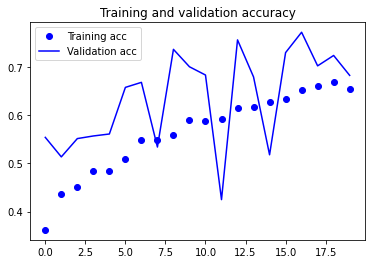

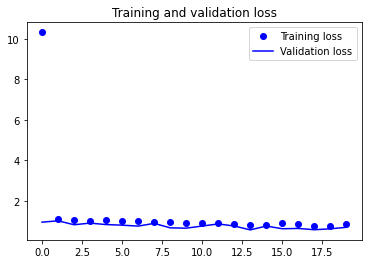

In [16]:
import matplotlib.pyplot as plt

acc = FNN_history.history['acc']
val_acc = FNN_history.history['val_acc']
loss = FNN_history.history['loss']
val_loss = FNN_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
model_score = FNN_model.evaluate_generator(test_generator)
print("FNN Test Loss:",model_score[0])
print("FNN Test Accuracy:",model_score[1])

FNN Test Loss: 0.7088722586631775
FNN Test Accuracy: 0.6857143044471741


## TASK 2: Build Convolution Neural Network
Now, let's try a convolution neural network (CNN) and see if we can achieve better performance. Similarly you are free to experiment with different structure of the network, techniques to avoid overfitting, different optimizer, and etc, to try to achieve the best performance on the TEST data in terms of accuracy.

Note that you should set test aside when you train your model. In the end, please report your model accuracy on the test set. 

In [18]:
# TODO
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [19]:

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50
      )

Epoch 1/15
100/100 [==============================] - 30s 303ms/step - loss: 1.1519 - acc: 0.4146 - val_loss: 0.6902 - val_acc: 0.6063
Epoch 2/15
100/100 [==============================] - 27s 265ms/step - loss: 0.6792 - acc: 0.7080 - val_loss: 0.2673 - val_acc: 0.8516
Epoch 3/15
100/100 [==============================] - 27s 265ms/step - loss: 0.4077 - acc: 0.8334 - val_loss: 0.0099 - val_acc: 0.9943
Epoch 4/15
100/100 [==============================] - 26s 264ms/step - loss: 0.3111 - acc: 0.8901 - val_loss: 0.0136 - val_acc: 0.9949
Epoch 5/15
100/100 [==============================] - 26s 264ms/step - loss: 0.2102 - acc: 0.9265 - val_loss: 0.0092 - val_acc: 1.0000
Epoch 6/15
100/100 [==============================] - 26s 265ms/step - loss: 0.1721 - acc: 0.9417 - val_loss: 0.0921 - val_acc: 0.9299
Epoch 7/15
100/100 [==============================] - 27s 267ms/step - loss: 0.1582 - acc: 0.9429 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 8/15
100/100 [==============================] - 2

In [20]:
model.save('Convolution.h5')

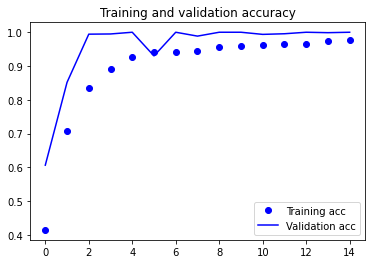

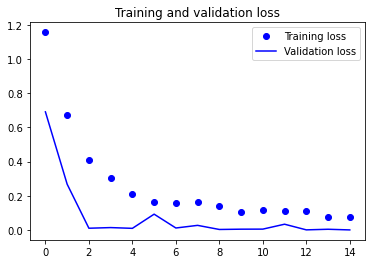

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
model_score = model.evaluate_generator(test_generator)
print("Convolution Test Loss:",model_score[0])
print("Convolution Test Accuracy:",model_score[1])

Convolution Test Loss: 0.0004384862259030342
Convolution Test Accuracy: 1.0


## Use the best model to classify gestures
You can now run the following code and use the model you trained to classify images uploaded from your laptop. Let us know how your model performs on the new unseen images.  

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper_gesture.jpeg to paper_gesture (1).jpeg
paper_gesture.jpeg
[[1. 0. 0.]]


Model performance: convolution model made the correct prediction. 


